# Ceci est un notebook pour la visualisation préliminaire des données du projet

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


In [2]:
#importer tous les fichiers csv du dossier transactions-ser avec pandas et les concatener dans un seul fichier pickle
def import_csv():
    import glob
    import os
    import pickle
    path = r'./transactions-ser'
    all_files = glob.glob(os.path.join(path, "*.csv"))
    df_from_each_file = (pd.read_csv(f, sep=';') for f in all_files)
    df = pd.concat(df_from_each_file, ignore_index=True)
    df.to_pickle("transaction_ser.pkl")
    return df
    

In [3]:
import_csv()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,2022-360376,2022-05-16,1,Vente,170000.0,6.0,None,PL DE L EGLISE,730,76800,...,80.0,4.0,S,sols,None,None,319.0,1.106595,49.382037,000AZ
1,2022-360376,2022-05-16,1,Vente,170000.0,37.0,None,RUE GAMBETTA,974,76800,...,NaN,NaN,S,sols,None,None,234.0,1.106238,49.382039,000AZ
2,2021-1184802,2021-11-10,1,Vente,107000.0,39.0,None,RUE GAMBETTA,974,76800,...,80.0,4.0,S,sols,None,None,38.0,1.106127,49.382122,000AZ
3,2021-1184802,2021-11-10,1,Vente,107000.0,39.0,None,RUE GAMBETTA,974,76800,...,NaN,0.0,S,sols,None,None,38.0,1.106127,49.382122,000AZ
4,2021-1184802,2021-11-10,1,Vente,107000.0,37.0,None,RUE GAMBETTA,974,76800,...,NaN,NaN,S,sols,None,None,234.0,1.106238,49.382039,000AZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,2017-543786,2017-08-28,1,Vente,65000.0,4.0,None,RUE DE FORT DE VAUX,910,76800,...,32.0,2.0,S,sols,None,None,268.0,1.107607,49.374767,000AT
2968,2017-543907,2017-08-25,1,Vente,181400.0,19.0,None,RUE DE LORRAINE,1510,76800,...,130.0,6.0,S,sols,None,None,401.0,1.100599,49.373885,000AT
2969,2017-543907,2017-08-25,1,Vente,181400.0,19.0,None,RUE DE LORRAINE,1510,76800,...,NaN,NaN,J,jardins,POTAG,Jardin potager,89.0,1.100471,49.373929,000AT
2970,2017-543682,2017-08-21,1,Vente,199000.0,29.0,None,CHE DU BON CLOS,300,76800,...,118.0,5.0,S,sols,None,None,362.0,1.100397,49.374971,000AT


## Données qui semblent utiles :
-- surface réelle du bien

-- surface réelle du terrain

-- nombre de pièces

-- localisation (adresse + code postal ou latitude/longitude ?)


## Pour l'entrainement :
-- prix du bien

-- type de bien

--date d'achat


In [50]:

ds = pd.read_pickle('transaction_ser.pkl')
#uniquement les types 'sols'
ds = ds[ds['code_nature_culture'] == 'S']

#supprimer les lignes avec valeur foncière qui n'est pas entre 500k 
ds = ds[ds['valeur_fonciere'] <= 500000]
ds = ds[ds['valeur_fonciere'] >= 5000]
#supprimer les lignes avec surface terrain > 25000
ds = ds[ds['surface_terrain'] < 25000]

#supprimer les lignes avec surface bati > 1000
ds = ds[ds['surface_reelle_bati'] < 1000]

#supprimer les lignes avec nombre de pièces > 10
ds = ds[ds['nombre_pieces_principales'] < 10]
ds = ds[ds['nombre_pieces_principales'] != 0]

new_ds = ds
new_ds['prix_metre_carre'] = new_ds['valeur_fonciere'] / new_ds['surface_reelle_bati']
new_ds = new_ds[['prix_metre_carre', 'latitude', 'longitude']]

new_ds = new_ds[new_ds['prix_metre_carre'] < 5000]
new_ds = new_ds[new_ds['prix_metre_carre'] > 500]
new_ds = new_ds.dropna()

#drop lines where valeur_fonciere is grater than 2 000 000



print(new_ds)
#heatmap des prix des maisons en fct de la latitude et de la longitude
def heatmap():
    #x = lat
    #y = long
    #color
    



heatmap()

IndentationError: expected an indented block (592224234.py, line 40)

In [19]:
ds =  pd.read_pickle("transaction_ser.pkl")
ds.nature_culture.unique()

array(['sols', 'jardins', 'None', "terrains d'agrément",
       'Terrain à bâtir', 'landes', 'taillis simples', 'prés', 'terres',
       'chemin de fer'], dtype=object)

In [55]:
ds = pd.read_pickle('transaction_ser.pkl')

#supprimer les colonnes inutiles (garder valeur foncière, surface, terrain, pièces)
ds = ds[['valeur_fonciere', 'surface_reelle_bati', 'surface_terrain', 'nombre_pieces_principales']]

#uniquement les types 'sols'
ds = ds[ds['nature_culture'] == 'sols']
#supprimer les lignes avec valeur foncière qui n'est pas entre 500k et 60k
ds = ds[ds['valeur_fonciere'] <= 500000]
ds = ds[ds['valeur_fonciere'] >= 60000]
#supprimer les lignes avec surface terrain > 25000
ds = ds[ds['surface_terrain'] < 1500]

#supprimer les lignes avec surface bati > 1000
ds = ds[ds['surface_reelle_bati'] < 1000]

#supprimer les lignes avec nombre de pièces > 10
ds = ds[ds['nombre_pieces_principales'] < 10]
ds = ds[ds['nombre_pieces_principales'] != 0]


#plotly matrix plot
def matrix_plot():
    fig = px.scatter_matrix(ds, dimensions=['valeur_fonciere', 'surface_reelle_bati', 'surface_terrain', 'nombre_pieces_principales'])
    

    #carre 1000x1000
    fig.update_layout(
        autosize=True,
        width=950,
        height=950,
    )

    fig.show()

matrix_plot()


In [20]:
ds = pd.read_pickle('transaction_ser.pkl')
ds

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,2022-360376,2022-05-16,1,Vente,170000.0,6.0,None,PL DE L EGLISE,730,76800,...,80.0,4.0,S,sols,None,None,319.0,1.106595,49.382037,000AZ
1,2022-360376,2022-05-16,1,Vente,170000.0,37.0,None,RUE GAMBETTA,974,76800,...,NaN,NaN,S,sols,None,None,234.0,1.106238,49.382039,000AZ
2,2021-1184802,2021-11-10,1,Vente,107000.0,39.0,None,RUE GAMBETTA,974,76800,...,80.0,4.0,S,sols,None,None,38.0,1.106127,49.382122,000AZ
3,2021-1184802,2021-11-10,1,Vente,107000.0,39.0,None,RUE GAMBETTA,974,76800,...,NaN,0.0,S,sols,None,None,38.0,1.106127,49.382122,000AZ
4,2021-1184802,2021-11-10,1,Vente,107000.0,37.0,None,RUE GAMBETTA,974,76800,...,NaN,NaN,S,sols,None,None,234.0,1.106238,49.382039,000AZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,2017-543786,2017-08-28,1,Vente,65000.0,4.0,None,RUE DE FORT DE VAUX,910,76800,...,32.0,2.0,S,sols,None,None,268.0,1.107607,49.374767,000AT
2968,2017-543907,2017-08-25,1,Vente,181400.0,19.0,None,RUE DE LORRAINE,1510,76800,...,130.0,6.0,S,sols,None,None,401.0,1.100599,49.373885,000AT
2969,2017-543907,2017-08-25,1,Vente,181400.0,19.0,None,RUE DE LORRAINE,1510,76800,...,NaN,NaN,J,jardins,POTAG,Jardin potager,89.0,1.100471,49.373929,000AT
2970,2017-543682,2017-08-21,1,Vente,199000.0,29.0,None,CHE DU BON CLOS,300,76800,...,118.0,5.0,S,sols,None,None,362.0,1.100397,49.374971,000AT


In [29]:
ds = pd.read_pickle('transaction_ser.pkl')
ds = ds[ds['adresse_numero'] == 33]
ds = ds[ds['adresse_nom_voie'] == 'RUE DES FUSILLES']

ds

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
1431,2018-1035048,2018-10-04,1,Vente,215000.0,33.0,None,RUE DES FUSILLES,940,76800,...,78.0,4.0,S,sols,None,None,97.0,1.090872,49.385041,000BH
1432,2018-1035048,2018-10-04,1,Vente,215000.0,33.0,None,RUE DES FUSILLES,940,76800,...,78.0,4.0,J,jardins,POTAG,Jardin potager,788.0,1.090872,49.385041,000BH


In [35]:
ds = pd.read_pickle('transaction_ser.pkl')
ds['count'] = 1
ds[['adresse_nom_voie','adresse_suffixe','adresse_numero', 'count']].groupby(['adresse_nom_voie', 'adresse_numero','adresse_suffixe']).count().sort_values(by='count', ascending=False)

count
adresse_nom_voie    adresse_numero adresse_suffixe       
RUE PAUL BERT       21.0           None                79
RUE DES HORTENSIAS  6.0            None                74
IMMEUBLE ATLANTIDE  9001.0         None                48
IMM F CHATEAU BLANC 9011.0         None                42
RUE PIERRE LUGAT    1.0            None                40
...                                                   ...
RUE DELILLE         59.0           None                 1
RUE DES ANEMONES    1.0            None                 1
                    3.0            B                    1
                    26.0           None                 1
RUE WEBER           20.0           None                 1

[1222 rows x 1 columns]

In [48]:
ds = pd.read_pickle('transaction_ser.pkl')
#uniquement les types 'sols'
ds = ds[ds['code_nature_culture'] == 'S']
#supprimer les colonnes inutiles (garder valeur foncière, surface, terrain, pièces)
ds = ds[['valeur_fonciere', 'surface_reelle_bati', 'surface_terrain', 'nombre_pieces_principales']]
ds = ds.dropna()


#supprimer les lignes avec valeur foncière > 2 000 000
ds = ds[ds['valeur_fonciere'] <= 500000]
ds = ds[ds['valeur_fonciere'] >= 5000]
#supprimer les lignes avec surface terrain > 25000
ds = ds[ds['surface_terrain'] < 25000]

#supprimer les lignes avec surface bati > 1000
ds = ds[ds['surface_reelle_bati'] < 1000]

#supprimer les lignes avec nombre de pièces > 10
ds = ds[ds['nombre_pieces_principales'] < 10]
ds = ds[ds['nombre_pieces_principales'] != 0]

In [63]:
#effectuer une regression linéaire pour trouver les coefficients de la fonction
from sklearn.linear_model import LinearRegression

X = ds[['surface_reelle_bati', 'surface_terrain']]
y = ds['valeur_fonciere']

reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_
reg.intercept_

#afficher les coefficients de la fonction et leurs labels
print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)
print("Score: ", reg.score(X, y))


#prédire le prix d'une maison de 100m², 1000m² de terrain et 5 pièces
reg.predict([[80, 200]])

    



Coefficients:  [606.7658395  111.21130839]
Intercept:  76574.08304722056
Score:  0.287636368535771


array([147357.61188644])

In [55]:
#utiliser la méthode lasso pour trouver les coefficients de la fonction
from sklearn.linear_model import Lasso

X = ds[['surface_reelle_bati', 'surface_terrain', 'nombre_pieces_principales']]
y = ds['valeur_fonciere']

reg = Lasso(alpha=0.1).fit(X, y)
reg.score(X, y)
reg.coef_
reg.intercept_

#afficher les coefficients de la fonction et leurs labels
print("Coefficients: ", reg.coef_)
print("Intercept: ", reg.intercept_)
print("Score: ", reg.score(X, y))

#prédire le prix d'une maison de 100m², 1000m² de terrain et 5 pièces
reg.predict([[80, 200, 1]])


Coefficients:  [  1041.7408876     109.54769919 -14679.55861301]
Intercept:  100827.90593362834
Score:  0.3206550833748646


array([191397.15816734])

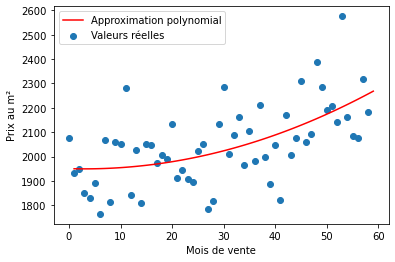

In [61]:
ds = pd.read_pickle('transaction_ser.pkl')
#uniquement les types 'sols'
ds = ds[ds['code_nature_culture'] == 'S']
#supprimer les colonnes inutiles (garder valeur foncière, surface, terrain, pièces)
ds = ds[['date_mutation','valeur_fonciere', 'surface_reelle_bati', 'surface_terrain', 'nombre_pieces_principales']]
ds = ds.dropna()


#supprimer les lignes avec valeur foncière > 2 000 000
ds = ds[ds['valeur_fonciere'] <= 500000]
ds = ds[ds['valeur_fonciere'] >= 5000]
#supprimer les lignes avec surface terrain > 25000
ds = ds[ds['surface_terrain'] < 25000]

#supprimer les lignes avec surface bati > 1000
ds = ds[ds['surface_reelle_bati'] < 1000]

#supprimer les lignes avec nombre de pièces > 10
ds = ds[ds['nombre_pieces_principales'] < 10]
ds = ds[ds['nombre_pieces_principales'] != 0]

ds = ds.dropna()

ds['prix_metre_carre'] = ds['valeur_fonciere'] / ds['surface_reelle_bati']
ds['prix_metre_carre_terrain'] = ds['valeur_fonciere'] / ds['surface_terrain']

#regrouper par mois et calculer la moyenne du prix au m²
ds = ds[['date_mutation', 'prix_metre_carre', 'prix_metre_carre_terrain']]
#supprimer les valeurs trop hautes :
ds = ds[ds['prix_metre_carre'] < 5000]
ds = ds[ds['prix_metre_carre'] > 1000]

ds = ds.groupby(['date_mutation']).mean()
ds = ds.reset_index()

#groupby month :
ds['date_mutation'] = pd.to_datetime(ds['date_mutation'])
ds['date_mutation'] = ds['date_mutation'].dt.to_period('M')

ds = ds.groupby(['date_mutation']).mean()
ds = ds.reset_index()

#date mutation en string
ds['date_mutation'] = ds['date_mutation'].astype(str)

#afficher avec plotly
import plotly.express as px
fig = px.line(ds, x='date_mutation', y='prix_metre_carre', title='Evolution des prix au m² en fonction du temps dans la ville de Saint-Etienne-Du-Rouvray')
#ajouter la légende des 2 axes
fig.update_xaxes(title_text='Date de vente')
fig.update_yaxes(title_text='Prix au m²')
fig.show()

#on crée une nouvelle colonne avec des ints allant de 1 à len(ds)
ds['date_mutation_int'] = range(0, len(ds))

#obtenir une approximation polynomiale de degré 3 de la fonction avec 'date_mutation_int' en x et 'prix_metre_carre' en y
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(ds['date_mutation_int'].values.reshape(-1, 1), ds['prix_metre_carre'].values.reshape(-1, 1))

#afficher l'approximation polynomiale
import matplotlib.pyplot as plt
import numpy as np

x_plot = np.linspace(1, len(ds), 100)
plt.scatter(ds['date_mutation_int'], ds['prix_metre_carre'])
plt.plot(x_plot, model.predict(x_plot[:, np.newaxis]), color='red')
#ajouter la légende des 2 axes
plt.xlabel('Mois de vente')
plt.ylabel('Prix au m²')
#légende
plt.legend(['Approximation polynomial', 'Valeurs réelles'])
plt.show()












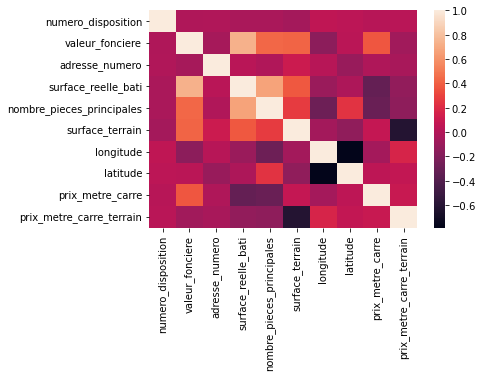

In [48]:

import seaborn as sns
import matplotlib.pyplot as plt

ds = pd.read_pickle('transaction_ser.pkl')
#uniquement les types 'sols'
ds = ds[ds['code_nature_culture'] == 'S']
#supprimer les colonnes inutiles (garder valeur foncière, surface, terrain, pièces)
ds = ds.dropna()


#supprimer les lignes avec valeur foncière > 2 000 000
ds = ds[ds['valeur_fonciere'] <= 500000]
ds = ds[ds['valeur_fonciere'] >= 5000]
#supprimer les lignes avec surface terrain > 25000
ds = ds[ds['surface_terrain'] < 25000]

#supprimer les lignes avec surface bati > 1000
ds = ds[ds['surface_reelle_bati'] < 1000]

#supprimer les lignes avec nombre de pièces > 10
ds = ds[ds['nombre_pieces_principales'] < 10]
ds = ds[ds['nombre_pieces_principales'] != 0]

ds = ds.dropna()

ds['prix_metre_carre'] = ds['valeur_fonciere'] / ds['surface_reelle_bati']
ds['prix_metre_carre_terrain'] = ds['valeur_fonciere'] / ds['surface_terrain']

#supprimer les valeurs trop hautes :
ds = ds[ds['prix_metre_carre'] < 3500]
ds = ds[ds['prix_metre_carre'] > 1000]

#drop code_commune, code_departement, nombre_lot
ds = ds.drop(columns=['code_commune', 'code_departement', 'nombre_lots'])
#afficher la matrice de corrélation
corr = ds.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()




In [28]:
ds.prix_metre_carre.sort_values(ascending=False).head(50)

1321    37250.000000
1315    29800.000000
1313    24833.333333
1316    17529.411765
1317    17529.411765
2766    16250.000000
2767    16250.000000
2769    16250.000000
2749    16250.000000
2750    16250.000000
2751    16250.000000
2752    16250.000000
2753    16250.000000
2754    16250.000000
2755    16250.000000
2768    16250.000000
1876    14253.333333
1319    13545.454545
1865    11111.111111
1877    10429.268293
1697    10043.478261
1702    10043.478261
1700     9625.000000
1318     9312.500000
1314     9312.500000
1741     8928.571429
1743     8928.571429
1744     8928.571429
1746     8928.571429
1747     8928.571429
1742     8928.571429
1698     8884.615385
59       6000.000000
1469     5312.500000
1489     5177.777778
1878     5090.476190
1704     5021.739130
1703     5021.739130
1320     4966.666667
1880     4804.494382
1879     4804.494382
1506     4666.666667
1490     4660.000000
1699     4620.000000
1701     4620.000000
1745     4166.666667
2327     4066.666667
1647     3846

In [4]:
#importer tous les fichiers csv du dossier transactions-ser avec pandas et les concatener dans un seul fichier pickle

def import_csv():
    import glob
    import os
    import pickle
    path = r'./transactions-ser'
    all_files = glob.glob(os.path.join(path, "*.csv"))
    #pour chaque ligne, ajouter une colonne 'cadastre' avec les 2 derniers caractères du nom du fichier avant .csv
    df_from_each_file = (pd.read_csv(f, sep=';', encoding='latin-1', low_memory=False).assign(cadastre=f[-6:-4]) for f in all_files)

    df = pd.concat(df_from_each_file, ignore_index=True)
    df.to_pickle("transaction_ser.pkl")
    return df
    


In [5]:
import_csv()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe,cadastre
0,2022-360376,2022-05-16,1,Vente,170000.0,6.0,None,PL DE L EGLISE,730,76800,...,4.0,S,sols,None,None,319.0,1.106595,49.382037,000AZ,AZ
1,2022-360376,2022-05-16,1,Vente,170000.0,37.0,None,RUE GAMBETTA,974,76800,...,NaN,S,sols,None,None,234.0,1.106238,49.382039,000AZ,AZ
2,2021-1184802,2021-11-10,1,Vente,107000.0,39.0,None,RUE GAMBETTA,974,76800,...,4.0,S,sols,None,None,38.0,1.106127,49.382122,000AZ,AZ
3,2021-1184802,2021-11-10,1,Vente,107000.0,39.0,None,RUE GAMBETTA,974,76800,...,0.0,S,sols,None,None,38.0,1.106127,49.382122,000AZ,AZ
4,2021-1184802,2021-11-10,1,Vente,107000.0,37.0,None,RUE GAMBETTA,974,76800,...,NaN,S,sols,None,None,234.0,1.106238,49.382039,000AZ,AZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,2017-543786,2017-08-28,1,Vente,65000.0,4.0,None,RUE DE FORT DE VAUX,910,76800,...,2.0,S,sols,None,None,268.0,1.107607,49.374767,000AT,AT
2968,2017-543907,2017-08-25,1,Vente,181400.0,19.0,None,RUE DE LORRAINE,1510,76800,...,6.0,S,sols,None,None,401.0,1.100599,49.373885,000AT,AT
2969,2017-543907,2017-08-25,1,Vente,181400.0,19.0,None,RUE DE LORRAINE,1510,76800,...,NaN,J,jardins,POTAG,Jardin potager,89.0,1.100471,49.373929,000AT,AT
2970,2017-543682,2017-08-21,1,Vente,199000.0,29.0,None,CHE DU BON CLOS,300,76800,...,5.0,S,sols,None,None,362.0,1.100397,49.374971,000AT,AT


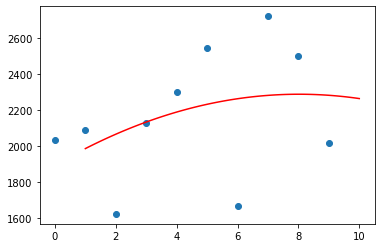

In [38]:
ds = pd.read_pickle('transaction_ser.pkl')
#uniquement les types 'sols'
ds = ds[ds['code_nature_culture'] == 'S']

ds = ds[ds['cadastre'] == 'AB']

#supprimer les colonnes inutiles (garder valeur foncière, surface, terrain, pièces)
ds = ds[['date_mutation','valeur_fonciere', 'surface_reelle_bati', 'surface_terrain', 'nombre_pieces_principales']]
ds = ds.dropna()


#supprimer les lignes avec valeur foncière > 2 000 000
ds = ds[ds['valeur_fonciere'] <= 500000]
ds = ds[ds['valeur_fonciere'] >= 5000]
#supprimer les lignes avec surface terrain > 25000
ds = ds[ds['surface_terrain'] < 25000]

#supprimer les lignes avec surface bati > 1000
ds = ds[ds['surface_reelle_bati'] < 1000]

#supprimer les lignes avec nombre de pièces > 10
ds = ds[ds['nombre_pieces_principales'] < 10]
ds = ds[ds['nombre_pieces_principales'] != 0]

ds = ds.dropna()

ds['prix_metre_carre'] = ds['valeur_fonciere'] / ds['surface_reelle_bati']
ds['prix_metre_carre_terrain'] = ds['valeur_fonciere'] / ds['surface_terrain']

#regrouper par mois et calculer la moyenne du prix au m²
ds = ds[['date_mutation', 'prix_metre_carre', 'prix_metre_carre_terrain']]
#supprimer les valeurs trop hautes :
ds = ds[ds['prix_metre_carre'] < 3500]
ds = ds[ds['prix_metre_carre'] > 1000]

ds = ds.groupby(['date_mutation']).mean()
ds = ds.reset_index()

#groupby month :
ds['date_mutation'] = pd.to_datetime(ds['date_mutation'])
ds['date_mutation'] = ds['date_mutation'].dt.to_period('w')

ds = ds.groupby(['date_mutation']).mean()
ds = ds.reset_index()

#date mutation en string
ds['date_mutation'] = ds['date_mutation'].astype(str)

#afficher avec plotly
import plotly.express as px
fig = px.line(ds, x='date_mutation', y='prix_metre_carre', title='Prix au m²')
fig.show()

#on crée une nouvelle colonne avec des ints allant de 1 à len(ds)
ds['date_mutation_int'] = range(0, len(ds))

#obtenir une approximation polynomiale de degré 3 de la fonction avec 'date_mutation_int' en x et 'prix_metre_carre' en y
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(ds['date_mutation_int'].values.reshape(-1, 1), ds['prix_metre_carre'].values.reshape(-1, 1))

#afficher l'approximation polynomiale
import matplotlib.pyplot as plt
import numpy as np

x_plot = np.linspace(1, len(ds), 100)
plt.scatter(ds['date_mutation_int'], ds['prix_metre_carre'])
plt.plot(x_plot, model.predict(x_plot[:, np.newaxis]), color='red')
plt.show()

In [41]:
ds = pd.read_pickle('transaction_ser.pkl')
#uniquement les types 'sols'
ds = ds[ds['code_nature_culture'] == 'S']


#supprimer les colonnes inutiles (garder valeur foncière, surface, terrain, pièces)
ds = ds[['cadastre','date_mutation','valeur_fonciere', 'surface_reelle_bati', 'surface_terrain', 'nombre_pieces_principales']]
ds = ds.dropna()


#supprimer les lignes avec valeur foncière > 2 000 000
ds = ds[ds['valeur_fonciere'] <= 500000]
ds = ds[ds['valeur_fonciere'] >= 5000]
#supprimer les lignes avec surface terrain > 25000
ds = ds[ds['surface_terrain'] < 25000]

#supprimer les lignes avec surface bati > 1000
ds = ds[ds['surface_reelle_bati'] < 1000]

#supprimer les lignes avec nombre de pièces > 10
ds = ds[ds['nombre_pieces_principales'] < 10]
ds = ds[ds['nombre_pieces_principales'] != 0]

ds = ds.dropna()

ds['prix_metre_carre'] = ds['valeur_fonciere'] / ds['surface_reelle_bati']
ds['prix_metre_carre_terrain'] = ds['valeur_fonciere'] / ds['surface_terrain']

#regrouper par mois et calculer la moyenne du prix au m²
ds = ds[['cadastre', 'prix_metre_carre', 'prix_metre_carre_terrain']]
#supprimer les valeurs trop hautes :
ds = ds[ds['prix_metre_carre'] < 3500]
ds = ds[ds['prix_metre_carre'] > 1000]

ds = ds.groupby(['cadastre']).mean()
ds = ds.reset_index()


In [43]:
#afficher le prix moyen au m² dans les cadastres
import plotly.express as px
fig = px.scatter(ds, x='cadastre', y='prix_metre_carre', title='Prix au m²')
#ajouter une ligne pour la moyenne totale
fig.add_hline(y=ds['prix_metre_carre'].mean())
fig.show()